In [3]:
import pandas as pd
import numpy as np
from math import sqrt
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
import locale
import datetime

ascii_cup ="""\
    (  )   (   )  )
     ) (   )  (  (
     ( )  (    ) )
     _____________
    <_____________> ___
    |             |/ _ \\
    |               | | |
    |               |_| |
 ___|             |\___/
/    \___________/    \\
\_____________________/
"""

In [4]:
df_past = pd.read_csv('Past_Data.csv')
df_past = df_past.rename(columns={"datetime_beginning_ept": "ds", "wind_generation_mw": "y"})
df_past = df_past[["ds", "y"]] #this isn't needed anymore. My first .csv had more columns.

#Sanity check
df_past.head()

,ds,y
0,2011-01-01 00:00,2012.0
1,2011-01-01 01:00,1700.0
2,2011-01-01 02:00,1902.0
3,2011-01-01 03:00,1947.0
4,2011-01-01 04:00,1977.0


In [5]:
df_past.dtypes
#notice that the datetime column is not in datetime format

ds     object
y     float64
dtype: object

In [6]:
df_past['ds']=pd.to_datetime(df_past['ds'])
df_past.dtypes
#much better

ds    datetime64[ns]
y            float64
dtype: object

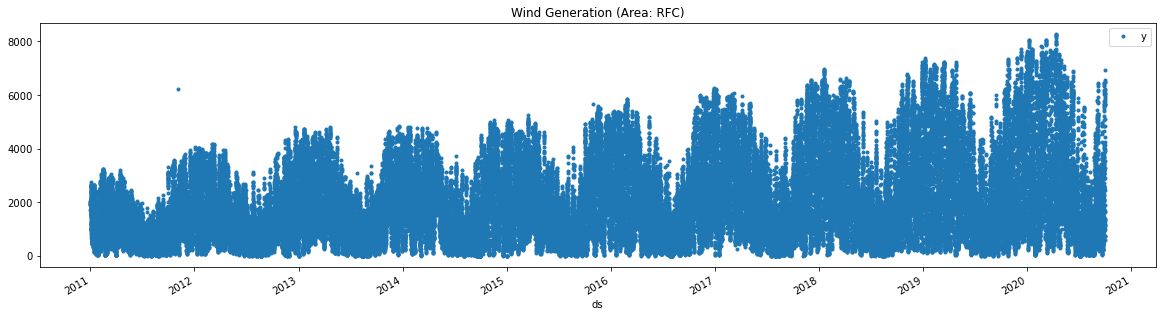

In [7]:
df_past.plot(x='ds', y='y', style='.', figsize=(20,5), title='Wind Generation (Area: RFC)')
pyplot.show()

In [8]:
# CAUTION
# On my laptop, this took several minutes. The dataframe is over 85,000 rows long.
# CAUTION
prophet = Prophet()
print("This is going to take a while..")
print("Go get a cup of tea while you wait..")
print(ascii_cup)
prophet.fit(df_past)
print("\ndone")

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


This is going to take a while..
Go get a cup of tea while you wait..
    (  )   (   )  )
     ) (   )  (  (
     ( )  (    ) )
     _____________
    <_____________> ___
    |             |/ _ \
    |               | | |
    |               |_| |
 ___|             |\___/
/    \___________/    \
\_____________________/


done


In [9]:
df_future = pd.read_csv('Actual_data.csv')
#Sanity checks
print(df_future.head())
df_future.tail()

  datetime_beginning_ept  wind_generation_mw
0         10/1/2020 0:00            4313.835
1         10/1/2020 1:00            4020.880
2         10/1/2020 2:00            3392.648
3         10/1/2020 3:00            3032.200
4         10/1/2020 4:00            2866.706


,datetime_beginning_ept,wind_generation_mw
1460,11/30/2020 19:00,5770.773
1461,11/30/2020 20:00,5250.974
1462,11/30/2020 21:00,4642.025
1463,11/30/2020 22:00,4463.984
1464,11/30/2020 23:00,4437.835


In [10]:
df_future = df_future.rename(columns={"datetime_beginning_ept": "ds", "wind_generation_mw": "y"})
df_future = df_future[["ds", "y"]] #at one point my .csv had more columns, keeping this just in case

#Sanity check
df_future.tail()

,ds,y
1460,11/30/2020 19:00,5770.773
1461,11/30/2020 20:00,5250.974
1462,11/30/2020 21:00,4642.025
1463,11/30/2020 22:00,4463.984
1464,11/30/2020 23:00,4437.835


In [11]:
df_future['ds']=pd.to_datetime(df_future['ds'])
df_future.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [12]:
forecast = prophet.predict(df=df_future)
print("done")

done


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1460,2020-11-30 19:00:00,2880.450024,1933.325997,4925.614113,2868.103807,2895.972866,527.946656,527.946656,527.946656,-0.551462,...,8.177898,8.177898,8.177898,520.320220,520.320220,520.320220,0.0,0.0,0.0,3408.396681
1461,2020-11-30 20:00:00,2880.472861,1741.094576,5046.865373,2868.110509,2896.011477,569.361530,569.361530,569.361530,39.064632,...,10.825729,10.825729,10.825729,519.471169,519.471169,519.471169,0.0,0.0,0.0,3449.834391
1462,2020-11-30 21:00:00,2880.495697,1944.143339,5142.680556,2868.117210,2896.050088,630.831176,630.831176,630.831176,98.873462,...,13.335308,13.335308,13.335308,518.622405,518.622405,518.622405,0.0,0.0,0.0,3511.326873
1463,2020-11-30 22:00:00,2880.518534,2073.860130,5117.017152,2868.123912,2896.088699,698.580982,698.580982,698.580982,165.130240,...,15.676772,15.676772,15.676772,517.773970,517.773970,517.773970,0.0,0.0,0.0,3579.099516
1464,2020-11-30 23:00:00,2880.541370,2069.595913,5242.772284,2868.130614,2896.127310,749.350114,749.350114,749.350114,214.601592,...,17.822615,17.822615,17.822615,516.925907,516.925907,516.925907,0.0,0.0,0.0,3629.891484


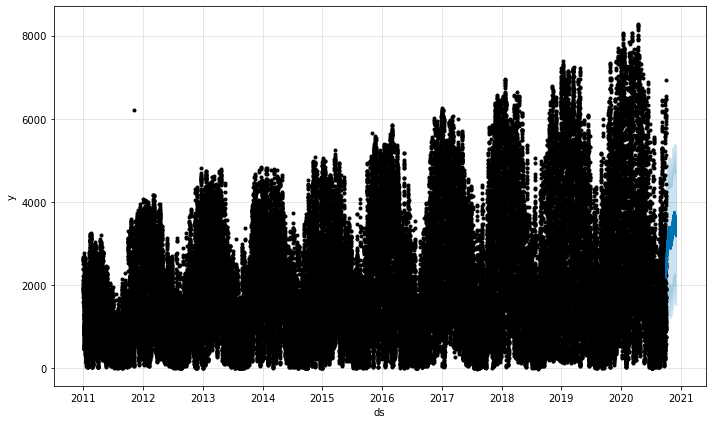

In [14]:
forecast_plot = prophet.plot(forecast)

In [15]:
locale.setlocale(locale.LC_ALL, 'en_US')

prophet_MSE_value = mean_squared_error(df_future['y'], forecast['yhat'])
prophet_MAE_value = mean_absolute_error(df_future['y'], forecast['yhat'])

prophet_RMSE_value = sqrt(mean_squared_error(df_future['y'], forecast['yhat']))

prophet_MSE_value = locale.format_string("%d", prophet_RMSE_value, grouping=True)
prophet_MAE_value = locale.format_string("%d", prophet_MAE_value, grouping=True)

print("Prophet - root mean squared error:", prophet_MSE_value)
print("Prophet - mean absolute error:", prophet_MAE_value)

##
#Prophet - root mean squared error: 2,168
# Prophet - mean absolute error: 1,835
##

Prophet - root mean squared error: 2,168
Prophet - mean absolute error: 1,835


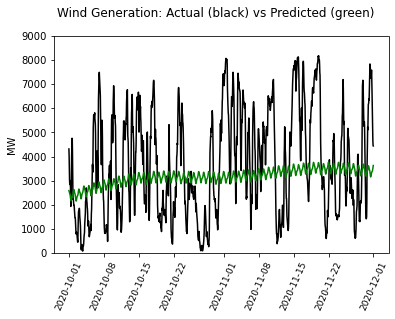

In [16]:
#At this point we have 3 dataframes: df_past, df_future, and forecast
#We can plot the df_future (actual data) VS forecast (prophet data) to visually see how close we are

graph = pyplot.figure()
axis = graph.add_subplot(111)
axis.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
axis.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
axis.xaxis.set_tick_params(rotation=66, labelsize=9)
axis.set_ylim(0,9000)
axis.set_ylabel('MW')

graph.suptitle("Wind Generation: Actual (black) vs Predicted (green)",)

pyplot.show()

Text(0, 0.5, 'MW Generation')

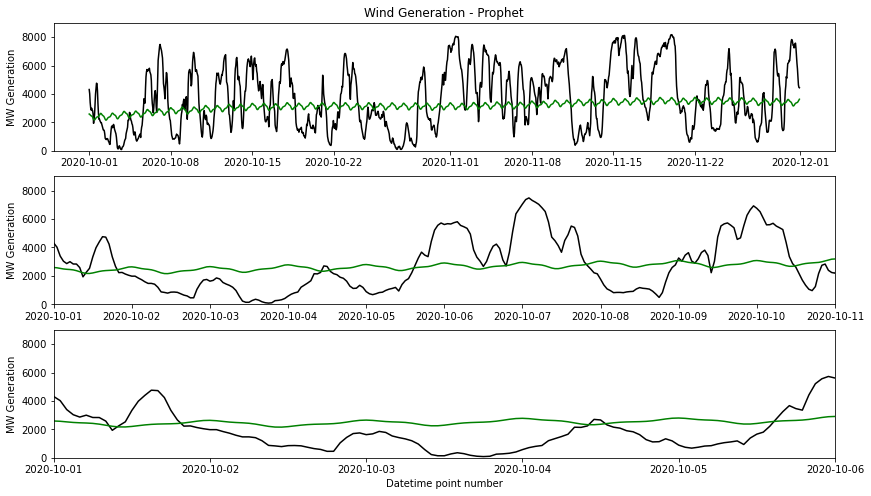

In [17]:
### ax.set_xlim([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])

plot = pyplot.figure(figsize=(14,8))

ax1 = plot.add_subplot(311)
ax1.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax1.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax1.set_ylim(0,9000)
pyplot.ylabel('MW Generation')
pyplot.title('Wind Generation - Prophet')
#
ax2 = plot.add_subplot(312)
ax2.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax2.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax2.set_ylim(0,9000)
ax2.set_xlim([datetime.date(2020,10,1), datetime.date(2020,10,11)])
pyplot.ylabel('MW Generation')

#
ax3 = plot.add_subplot(313)
ax3.plot_date(x=df_future["ds"], y=df_future["y"], fmt="k-")
ax3.plot_date(x=forecast["ds"], y=forecast["yhat"], fmt="g-")
ax3.set_ylim(0,9000)
ax3.set_xlim([datetime.date(2020,10,1), datetime.date(2020,10,6)])
pyplot.xlabel('Datetime point number')
pyplot.ylabel('MW Generation')